# A Simple Example of Analyzing COVID-19 Data in Python

## Data Source

The data is downloaded from  [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).
Upload the data to an S3 bucket, and import the necessary python libraries.

In [1]:
%matplotlib inline
import pandas 

## Import Data from S3 Bucket

In [2]:
df = pandas.read_excel('s3://wei-ia241/COVID-19-geographic-disbtribution-worldwide.xlsx')
df[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
3,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
5,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
6,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
8,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
9,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0


## The Sum of Case Numbers per Day

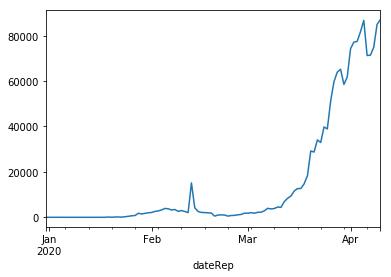

In [3]:
sum_death_by_date = df.groupby('dateRep').sum()['cases']

sum_death_by_date.plot()

## The Top 10 Countries with the Highest Deaths

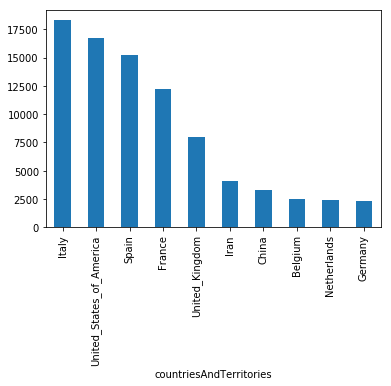

In [4]:
sum_death_by_country = df.groupby('countriesAndTerritories').sum()['deaths']
sum_death_by_country.nlargest(10).plot.bar()

## The List of the Unique Countries and Territories

In [5]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Andorra', 'Algeria', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Es

## Select the USA Data

In [6]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data[:10] #the top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9580,2020-04-10,10,4,2020,33901,1873,United_States_of_America,US,USA,327167434.0
9581,2020-04-09,9,4,2020,33323,1922,United_States_of_America,US,USA,327167434.0
9582,2020-04-08,8,4,2020,30613,1906,United_States_of_America,US,USA,327167434.0
9583,2020-04-07,7,4,2020,30561,1342,United_States_of_America,US,USA,327167434.0
9584,2020-04-06,6,4,2020,25398,1146,United_States_of_America,US,USA,327167434.0
9585,2020-04-05,5,4,2020,34272,1344,United_States_of_America,US,USA,327167434.0
9586,2020-04-04,4,4,2020,32425,1104,United_States_of_America,US,USA,327167434.0
9587,2020-04-03,3,4,2020,28819,915,United_States_of_America,US,USA,327167434.0
9588,2020-04-02,2,4,2020,27103,1059,United_States_of_America,US,USA,327167434.0
9589,2020-04-01,1,4,2020,24998,909,United_States_of_America,US,USA,327167434.0


## How the Number of Cases is Related to the Number of Deaths

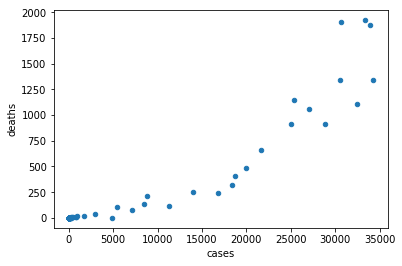

In [7]:
usa_data.plot.scatter(x='cases',y='deaths')